In [3]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras

from imgaug.augmentables.kps import KeypointsOnImage
from imgaug.augmentables.kps import Keypoint
import imgaug.augmenters as iaa

# Data loading and generation

In [4]:
training_set_annotations = pd.read_csv('training_data/annotations.csv').drop('Unnamed: 0', axis=1).set_index('file_path').fillna(method = 'ffill')
keypoints_names = list(dict.fromkeys(["_".join(index_name.split("_")[:-1]) for index_name in training_set_annotations.columns]))
training_set_annotations.columns

C:\Users\Legion\AppData\Local\Temp\ipykernel_4344\4072160914.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  training_set_annotations = pd.read_csv('training_data/annotations.csv').drop('Unnamed: 0', axis=1).set_index('file_path').fillna(method = 'ffill')


Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [5]:
training_set_annotations.iloc[:5]

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
file_path                                                             
0.jpg               0.687850           0.406274            0.314865   
1.jpg               0.670135           0.364272            0.311972   
2.jpg               0.677678           0.363642            0.321914   
3.jpg               0.679435           0.388143            0.333574   
4.jpg               0.695055           0.412721            0.335883   

           right_eye_center_y  left_eye_inner_corner_x  \
file_path                                                
0.jpg                0.379392                 0.620647   
1.jpg                0.348424                 0.613085   
2.jpg                0.363642                 0.618875   
3.jpg                0.388143                 0.625035   
4.jpg                0.396271                 0.610061   

           left_eye_inner_corner_y  left_eye_outer_corner_x  \
file_path                                                     
0.jpg                     0.412994                 0.761774   
1.jpg                     0.367441                 0.736695   
2.jpg                     0.378343                 0.739421   
3.jpg                     0.407575                 0.753278   
4.jpg                     0.412721                 0.755374   

           left_eye_outer_corner_y  right_eye_inner_corner_x  \
file_path                                                      
0.jpg                     0.416354                  0.378714   
1.jpg                     0.376950                  0.375362   
2.jpg                     0.378343                  0.392480   
3.jpg                     0.399802                  0.391861   
4.jpg                     0.415463                  0.385233   

           right_eye_inner_corner_y  ...  nose_tip_x  nose_tip_y  \
file_path                            ...                           
0.jpg                      0.389473  ...    0.462714    0.594446   
1.jpg                      0.357933  ...    0.502149    0.579801   
2.jpg                      0.378343  ...    0.495388    0.557697   
3.jpg                      0.403689  ...    0.540470    0.564235   
4.jpg                      0.407238  ...    0.451037    0.675933   

           mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
file_path                                                                   
0.jpg                 0.637451             0.833023              0.298068   
1.jpg                 0.587723             0.795333              0.365858   
2.jpg                 0.633572             0.760566              0.351316   
3.jpg                 0.683322             0.757330              0.387974   
4.jpg                 0.631994             0.807534              0.324914   

           mouth_right_corner_y  mouth_center_top_lip_x  \
file_path                                                 
0.jpg                  0.806135                0.451173   
1.jpg                  0.792163                0.486298   
2.jpg                  0.757625                0.492447   
3.jpg                  0.772870                0.523991   
4.jpg                  0.802055                0.468362   

           mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
file_path                                                      
0.jpg                    0.759744                   0.449278   
1.jpg                    0.731943                   0.473624   
2.jpg                    0.731164                   0.492447   
3.jpg                    0.730122                   0.537096   
4.jpg                    0.767785                   0.460699   

           mouth_center_bottom_lip_y  
file_path                             
0.jpg                       0.880060  
1.jpg                       0.890418  
2.jpg                       0.819368  
3.jpg                       0.815296  
4.jpg                       0.904908  

[5 rows x 30 columns]

In [6]:
training_set_annotations.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

# Data augmentations

In [7]:
INPUT_SIZE = (288, 288, 1)

train_aug = iaa.Sequential(
    [
        iaa.Resize(INPUT_SIZE[:2], interpolation="linear"),
        iaa.Fliplr(0.3),
        iaa.Sometimes(0.1, iaa.Affine(rotate=10, scale=(0.5, 0.7))),
        iaa.Sometimes(0.1, iaa.Affine(rotate=350, scale=(0.5, 0.7))),
        iaa.Sometimes(0.1, iaa.Affine(rotate=30, scale=(0.5, 1.5))),
        iaa.Sometimes(0.1, iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}))
    ]
)

test_aug = iaa.Sequential([iaa.Resize(INPUT_SIZE[:2], interpolation="linear")])

In [8]:
def model_output_to_keypoints_coordinates(output: np.array) -> dict:
    ret = {}
    for i, keypoint_name in enumerate(keypoints_names):
        keypoint_coordinates = output[0][(i*2):(2*i+2)]
        ret[keypoint_name] = keypoint_coordinates
    return ret

In [9]:
class DataGenerator(keras.utils.Sequence):
    def __init__(
        self,
        df: pd.DataFrame,
        images_path: str,
        batch_size: int,
        shuffle: bool = True,
        keys: list = None,
        aug: iaa.Augmenter = None,
        yield_3d: bool = False
    ):
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = [i for i in df.index]
        if keys is not None:
            self.indexes = [i for i in keys]
        self.datalen = len(self.indexes)
        self.images_path = images_path
        self.images = self.indexes.copy()
        #self.images = np.array([cv2.cvtColor(self._load_image(index), cv2.COLOR_GRAY2BGR) if yield_3d else self._load_image(index) for index in self.indexes])
        self.keypoints = df.loc[self.indexes].to_numpy()
        self.indexes = np.arange(self.datalen)
        self.aug = aug
        self.input_size = INPUT_SIZE
        if yield_3d:
            self.input_size = INPUT_SIZE[:2] + (3,)
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def _load_image(self, path: str) -> np.array:
        return cv2.cvtColor(
            cv2.imread(self.images_path + "/" + path), cv2.COLOR_BGR2GRAY
        )[:, :, np.newaxis]

    def __getitem__(self, index):
        # get batch indexes from shuffled indexes
        batch_indexes = self.indexes[
            index * self.batch_size : (index + 1) * self.batch_size
        ]
        keypoints = self.keypoints[batch_indexes]
        images = np.array([self._load_image(path) for path in self.images])
        # Data augmentation
        if self.aug is not None:
            images_tmp = np.empty((self.batch_size,) + self.input_size)
            keypoints = np.empty((self.batch_size,)+(len(keypoints_names)*2,))
            for i, (image, keypoints_img) in enumerate(zip(images, self.keypoints[batch_indexes])):
                kps = []
                for _, keyp in model_output_to_keypoints_coordinates([keypoints_img]).items():
                    kps.append(Keypoint(x = keyp[0] * image.shape[1], y = keyp[1] * image.shape[0]))
                kps_obj = KeypointsOnImage(kps, shape=image.shape)
                augmented_img, augmented_kps = self.aug(image = image, keypoints = kps_obj)
                images_tmp[i, ] = augmented_img / 255
                keypoints_tmp = []
                for keypoint in augmented_kps:
                    keypoints_tmp.append(keypoint.x / INPUT_SIZE[1])
                    keypoints_tmp.append(keypoint.y / INPUT_SIZE[0])
                keypoints[i, ] = np.array(keypoints_tmp)
                images = images_tmp
        return images, keypoints

    def __len__(self):
        # Denotes the number of batches per epoch
        return self.datalen // self.batch_size

    def on_epoch_end(self):
        # Updates indexes after each epoch
        self.indexes = np.arange(self.datalen)
        if self.shuffle:
            np.random.shuffle(self.indexes)


gen = DataGenerator(training_set_annotations, "training_data", 32, aug = train_aug, yield_3d=False)
print("INPUT SHAPE", gen[0][0][0].shape)
print("OUTPUT SHAPE", gen[0][1][0].shape)
print(len(gen))

INPUT SHAPE (288, 288, 1)
OUTPUT SHAPE (30,)
220


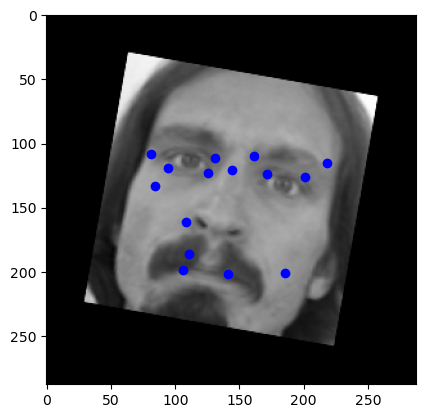

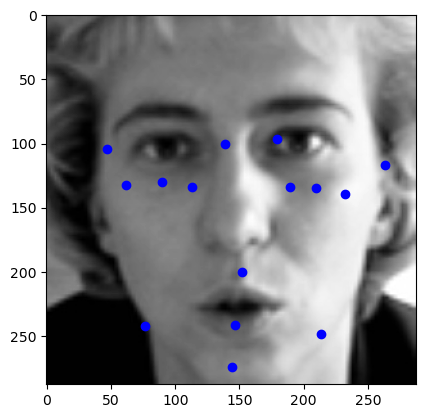

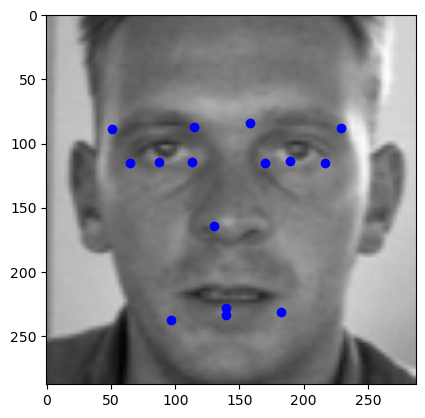

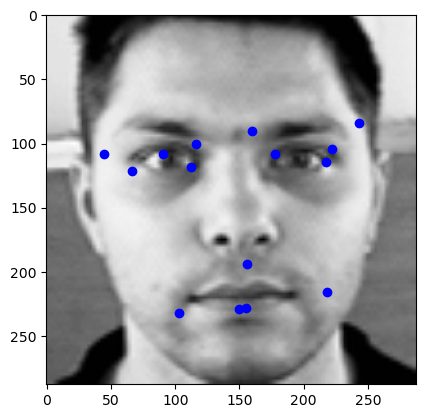

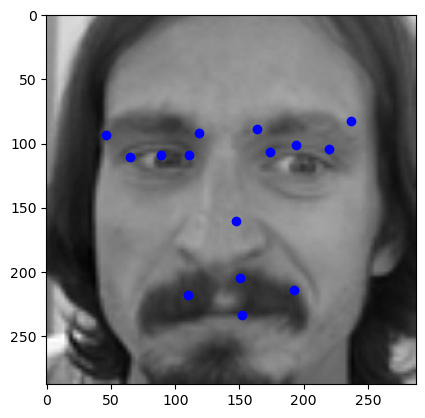

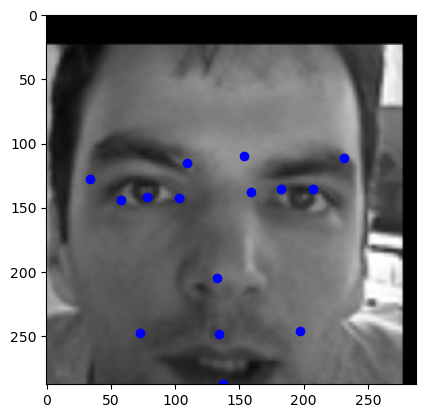

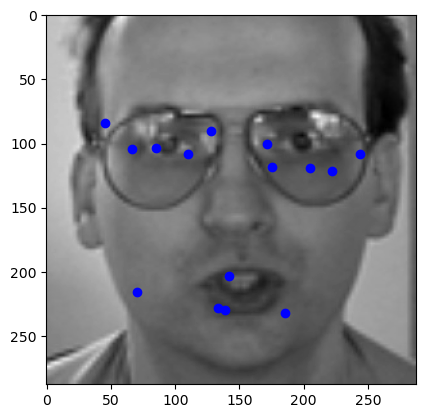

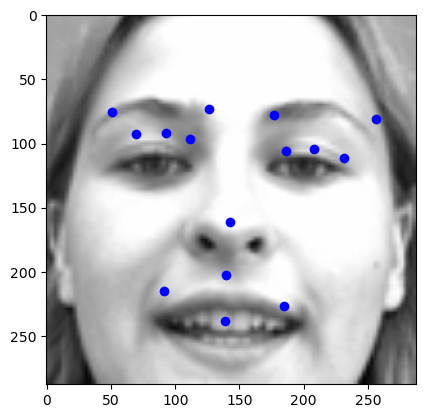

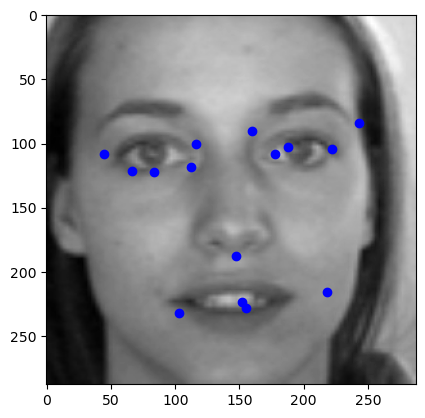

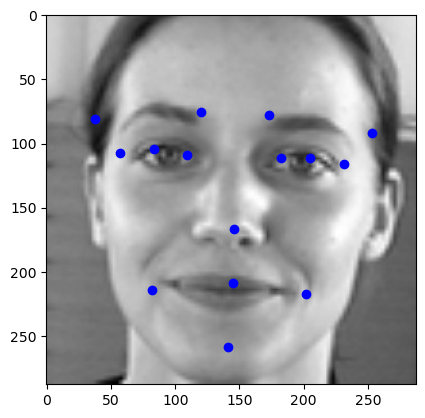

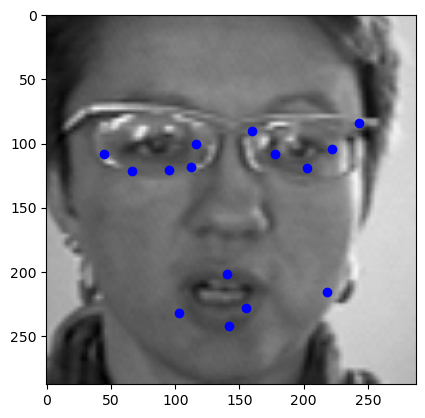

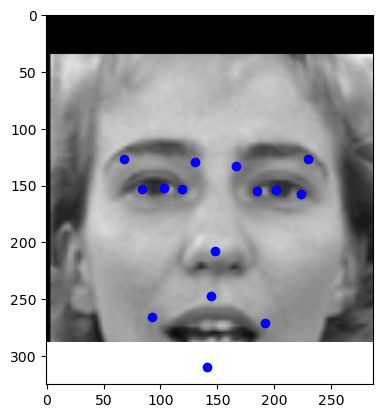

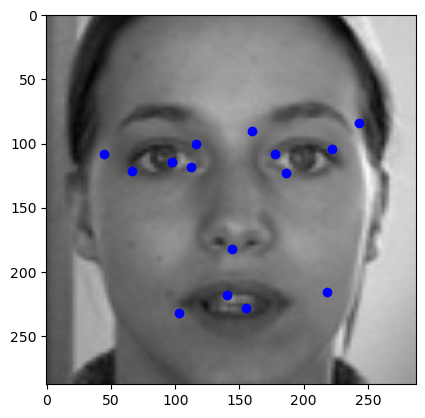

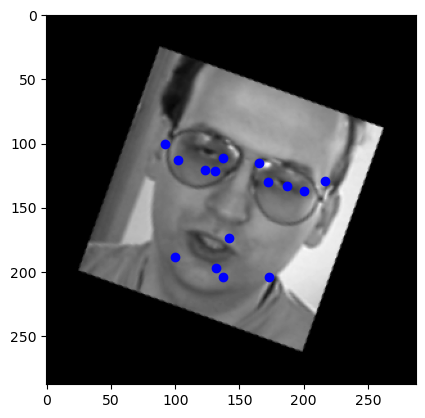

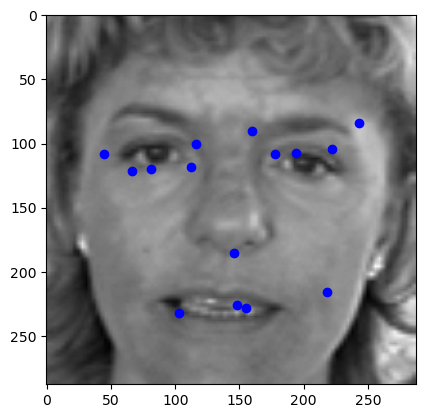

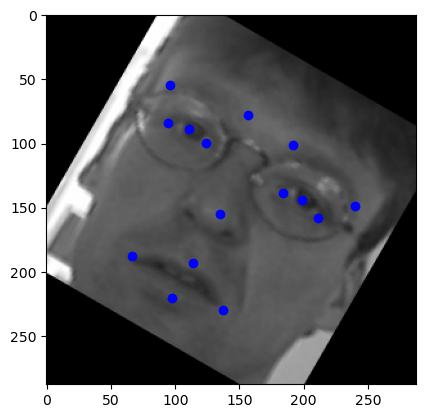

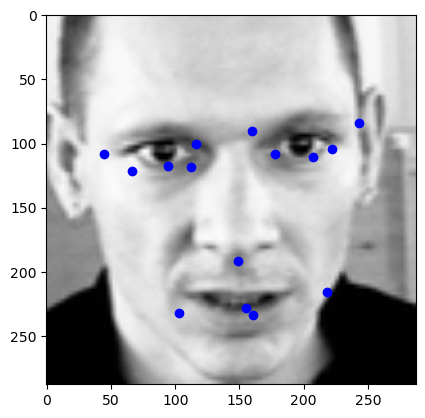

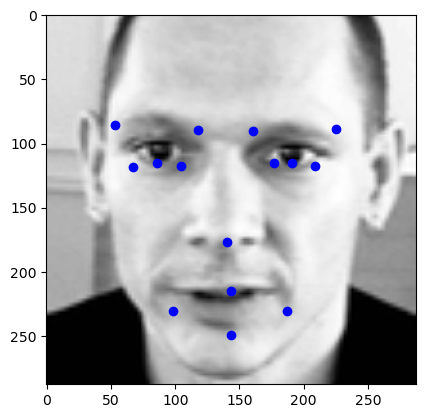

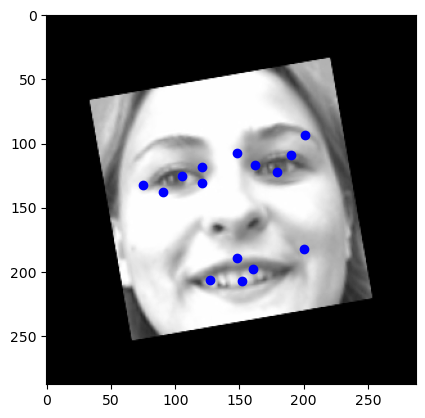

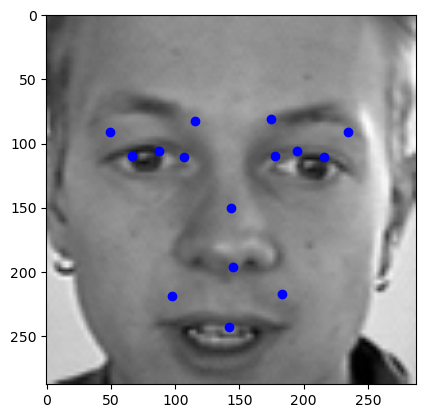

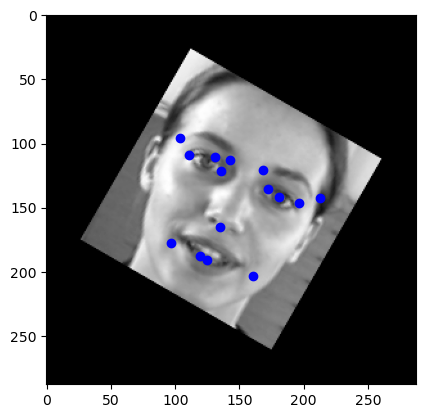

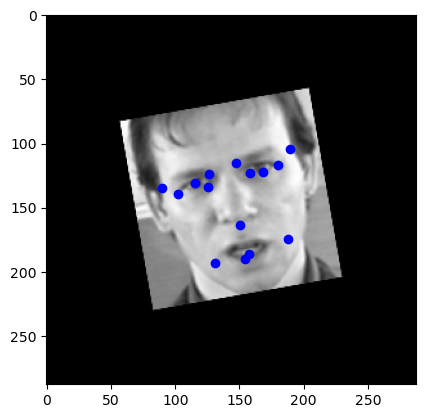

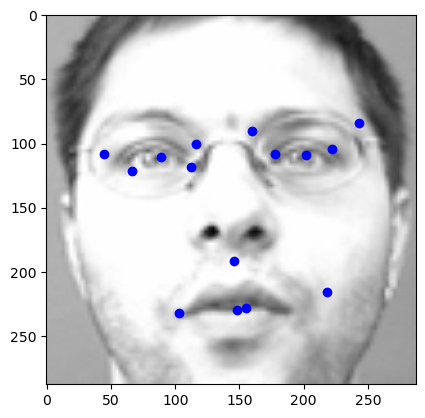

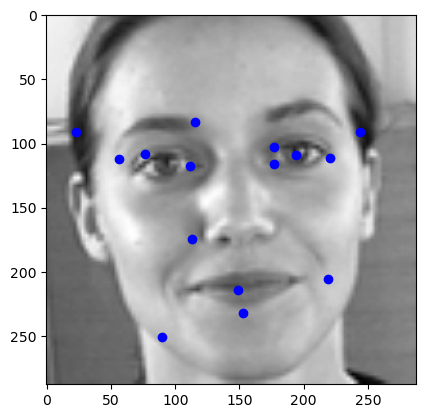

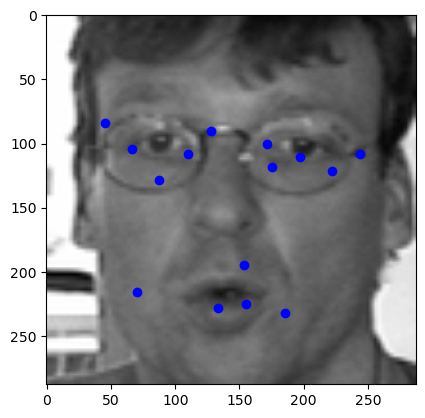

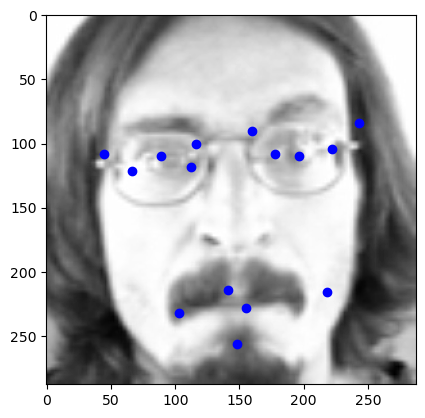

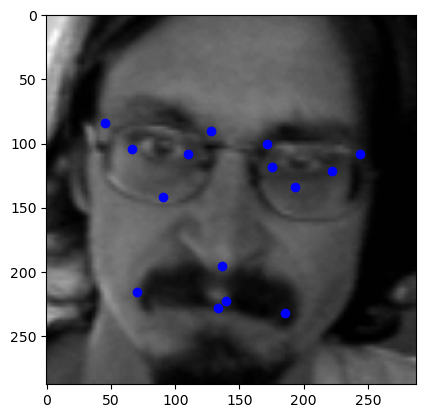

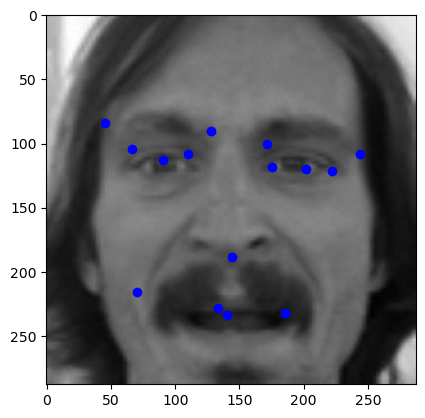

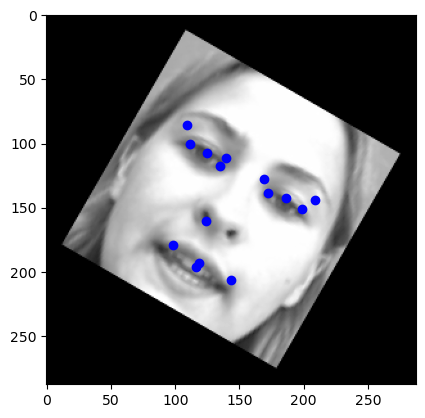

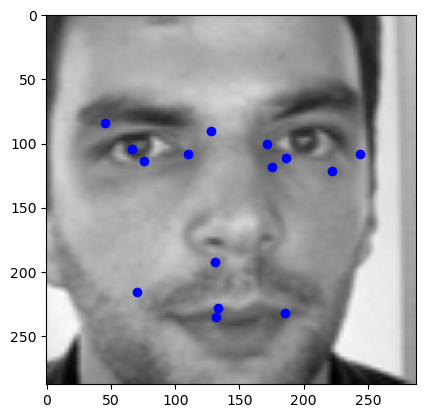

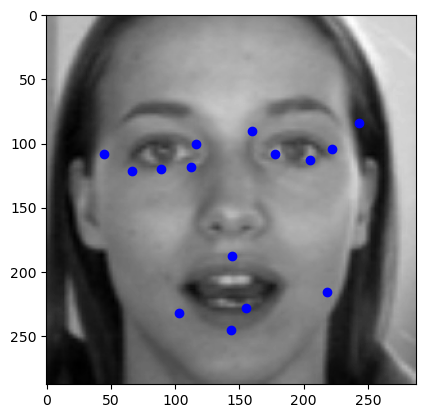

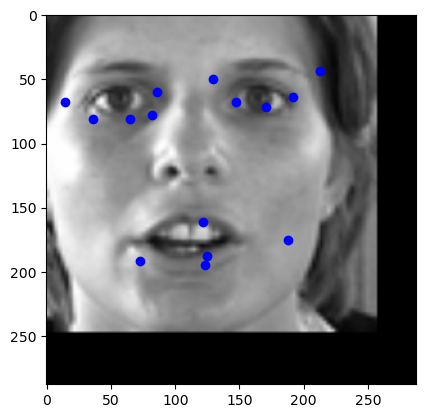

In [10]:
def display_image_with_keypoints(img: np.array, keypoints: list):
    fig, ax = plt.subplots()
    ax.imshow(img * 255, cmap='gray')
    keyps_reshaped = keypoints.reshape(-1, 2)
    ax.scatter(keyps_reshaped[:,0] * img.shape[1], keyps_reshaped[:,1] * img.shape[0], color='blue')
    plt.show()
    
imgs, keyps = gen[0]
for i in range(32):
    display_image_with_keypoints(imgs[i], keyps[i])

# Model training

In [11]:
BATCH_SIZE = 16
EPOCHS = 5

In [12]:
from sklearn.model_selection import train_test_split

train_val_keys, test_keys = train_test_split(training_set_annotations.index, test_size = 0.2)
train_keys, val_keys = train_test_split(train_val_keys, test_size=0.2)
training_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys=train_keys, aug = train_aug)
validation_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys=val_keys, aug = test_aug)

test_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys = test_keys, aug = test_aug)

### Model 1

In [13]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

model1 = Sequential()

model1.add(Convolution2D(128, (3, 3), input_shape = INPUT_SIZE, activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D())

model1.add(Convolution2D(64, (3, 3), activation = 'tanh'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D())

model1.add(Convolution2D(32, (3, 3), activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D())

model1.add(Convolution2D(16, (3, 3), activation = 'tanh'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D())

model1.add(Convolution2D(8, (3, 3), activation = 'leaky_relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D())

model1.add(Convolution2D(4, (3, 3), activation = 'tanh'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D())
model1.add(Dropout(0.3))

model1.add(Flatten())
model1.add(Dropout(0.3))
model1.add(Dense(64, activation = 'linear'))
model1.add(Dense(30, activation = 'sigmoid'))
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 286, 286, 128)     1280      
                                                                 
 batch_normalization (Batch  (None, 286, 286, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 143, 143, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 141, 141, 64)      73792     
                                                                 
 batch_normalization_1 (Bat  (None, 141, 141, 64)      256       
 chNormalization)                                                
                                                     

# Model 2

In [18]:
import keras
from keras import layers


backbone = keras.applications.mobilenet_v2.MobileNetV2(
        weights="imagenet",
        include_top=False,
        input_shape=(224, 224, 3),
        classifier_activation="tanh"
)
backbone.trainable = True

inputs = layers.Input((288, 288, 3))
x = keras.applications.mobilenet_v2.preprocess_input(inputs)
x = backbone(inputs)
x = layers.SeparableConv2D(256, kernel_size=(3, 3), activation="leaky_relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
outputs = layers.Dense(30, activation="sigmoid")(x)

model2 = keras.Model(inputs, outputs, name="keypoint_detector")

In [14]:
def compile_and_train(
    model: keras.Model,
    optimizer: keras.optimizers.Optimizer,
    loss: keras.losses.Loss,
    model_name: str = "model",
) -> keras.Model:
    model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
        filepath=f"checkpoint_{model_name}_{optimizer._name}_{loss.__name__}.keras",
        monitor="val_loss",
        mode="auto",
        save_best_only=True,
    )
    model_early_callback = keras.callbacks.EarlyStopping(
        monitor = "val_loss",
        restore_best_weights = True
    )
    print(optimizer._name, loss.__name__)
    model.compile(optimizer=optimizer, loss=loss, metrics = [keras.metrics.MeanSquaredError(), keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsolutePercentageError(), keras.metrics.MeanAbsoluteError()])
    history = model.fit(
        training_set,
        epochs=EPOCHS,
        validation_data=validation_set,
        callbacks=[model_checkpoint_callback, model_early_callback],
        workers=8,
        use_multiprocessing=False,
        max_queue_size=32
    )
    model.save(f"{model_name}_{optimizer._name}_{loss.__name__}.keras")
    return model, history

In [15]:
optimizers_to_check = [
    keras.optimizers.legacy.Adam(),
    keras.optimizers.legacy.RMSprop(),
    keras.optimizers.legacy.SGD()
]

losses_to_check = [
    keras.losses.mean_squared_error,
    keras.losses.mean_absolute_error,
    keras.losses.mean_absolute_percentage_error
]

In [16]:
res_metrics = {}

for optimizer in optimizers_to_check:
    for loss in losses_to_check:
        file_name = f"model1_{optimizer._name}_{loss.__name__}.keras"
        if not os.path.exists(file_name):
            _, history = compile_and_train(model1, optimizer, loss, "model1")
            res_metrics[file_name] = history

Adam mean_squared_error


Epoch 1/5

 40/281 [===>..........................] - ETA: 19:50 - loss: 0.0410 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.2026 - mean_absolute_percentage_error: 45.6856 - mean_absolute_error: 0.1558

In [27]:
res_metrics = {}
training_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys=train_keys, aug = train_aug, yield_3d=True)
validation_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys=val_keys, aug = test_aug, yield_3d=True)

test_set = DataGenerator(training_set_annotations, 'training_data', BATCH_SIZE, keys = test_keys, aug = test_aug, yield_3d=True)

for optimizer in optimizers_to_check:
    for loss in losses_to_check:
        file_name = f"model2_{optimizer._name}_{loss.__name__}.keras"
        if not os.path.exists(file_name):
            _, history = compile_and_train(model2, optimizer, loss, "model2")
            res_metrics[file_name] = history

Adam mean_squared_error
Epoch 1/5
281/281 [==============================] - 439s 2s/step - loss: 0.0153 - root_mean_squared_error: 0.1235 - mean_absolute_percentage_error: 28.2588 - mean_absolute_error: 0.0772 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2004 - val_mean_absolute_percentage_error: 38.3416 - val_mean_absolute_error: 0.1583
Epoch 2/5
197/281 [====================>.........] - ETA: 1:58 - loss: 0.0146 - root_mean_squared_error: 0.1207 - mean_absolute_percentage_error: 27.3389 - mean_absolute_error: 0.0750

KeyboardInterrupt: 

In [10]:
def load_model_from_weights(path: str) -> keras.Model:
    return keras.models.load_model(path)

In [11]:
model1 = load_model_from_weights('model1_RMSprop_mean_absolute_error.keras')

In [12]:
model1.evaluate(test_set)


 5/88 [>.............................] - ETA: 45s - loss: 0.0745 - root_mean_squared_error: 0.0880 - mean_absolute_percentage_error: 21.4027 - mean_absolute_error: 0.0745

KeyboardInterrupt: 

In [19]:
img = test_set[0][0][10]
res = model1.predict(np.array([img]))

1/1 [==============================] - 0s 77ms/step


In [20]:
res

array([[0.600665  , 0.4540531 , 0.41810223, 0.43913764, 0.5689213 ,
        0.43984383, 0.6235033 , 0.39874604, 0.44449037, 0.43564785,
        0.34725627, 0.4751583 , 0.5154828 , 0.36480865, 0.69148695,
        0.34187162, 0.4275676 , 0.400173  , 0.3279415 , 0.43710852,
        0.47497934, 0.6391424 , 0.630233  , 0.6658731 , 0.4352978 ,
        0.6914053 , 0.5046875 , 0.7112568 , 0.4867992 , 0.68611676]],
      dtype=float32)

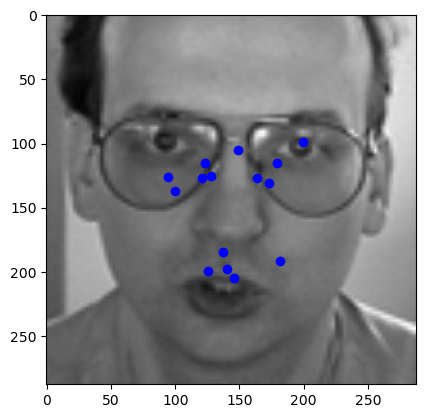

In [21]:
display_image_with_keypoints(img, res)

# Filters

In [53]:
keypoints_names

['left_eye_center',
 'right_eye_center',
 'left_eye_inner_corner',
 'left_eye_outer_corner',
 'right_eye_inner_corner',
 'right_eye_outer_corner',
 'left_eyebrow_inner_end',
 'left_eyebrow_outer_end',
 'right_eyebrow_inner_end',
 'right_eyebrow_outer_end',
 'nose_tip',
 'mouth_left_corner',
 'mouth_right_corner',
 'mouth_center_top_lip',
 'mouth_center_bottom_lip']

left_eye_center


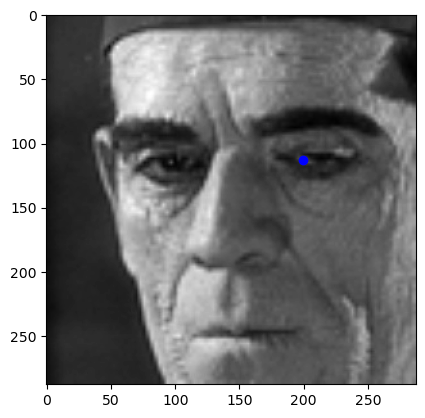

right_eye_center


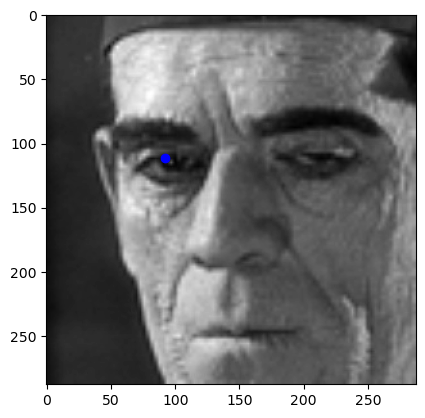

left_eye_inner_corner


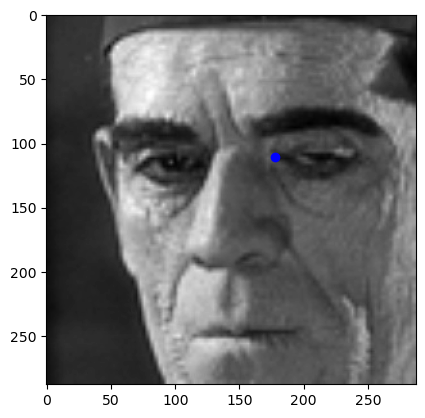

left_eye_outer_corner


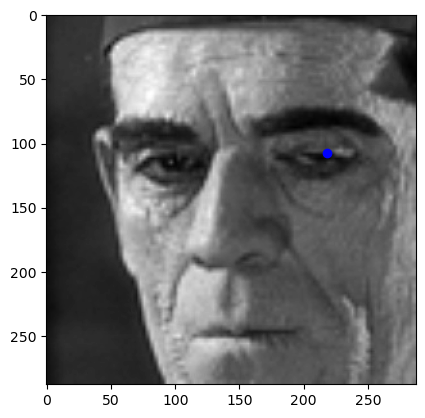

right_eye_inner_corner


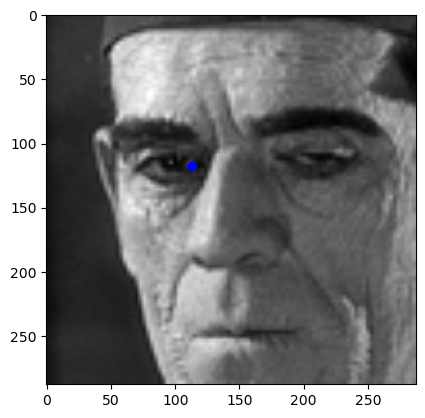

right_eye_outer_corner


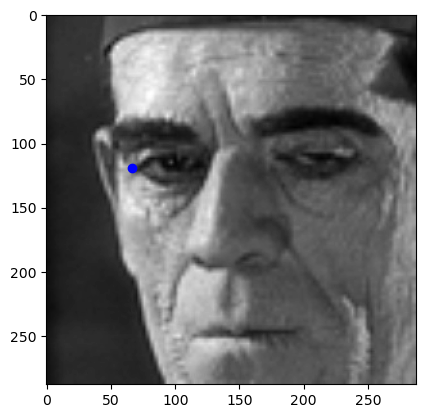

left_eyebrow_inner_end


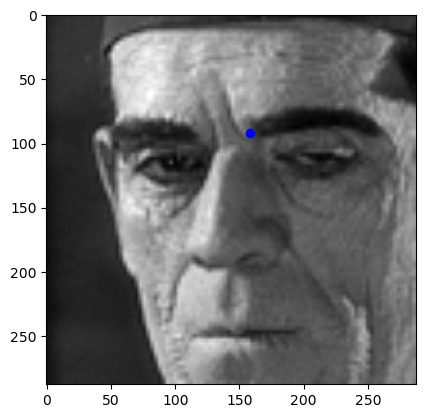

left_eyebrow_outer_end


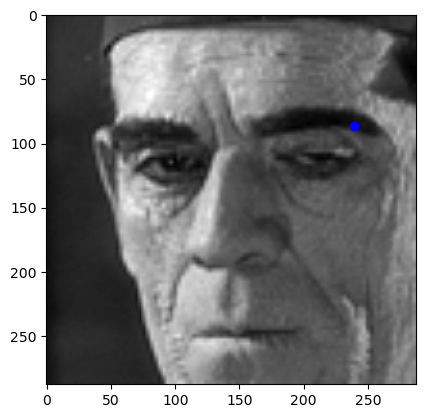

right_eyebrow_inner_end


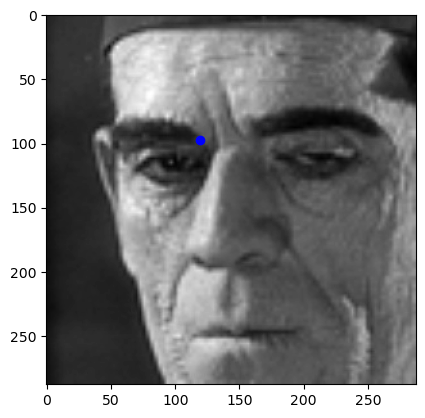

right_eyebrow_outer_end


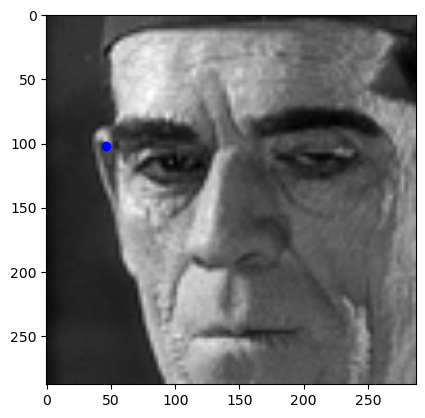

nose_tip


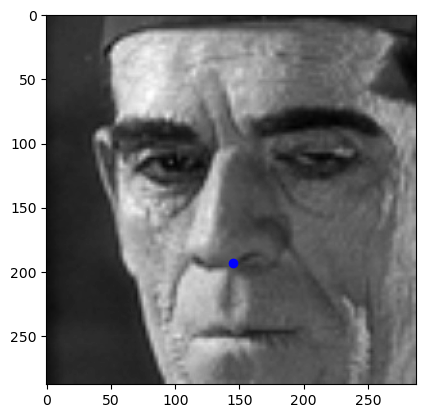

mouth_left_corner


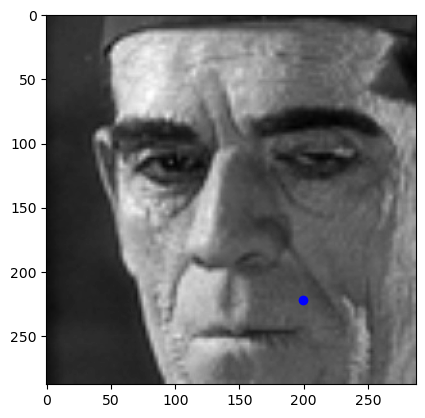

mouth_right_corner


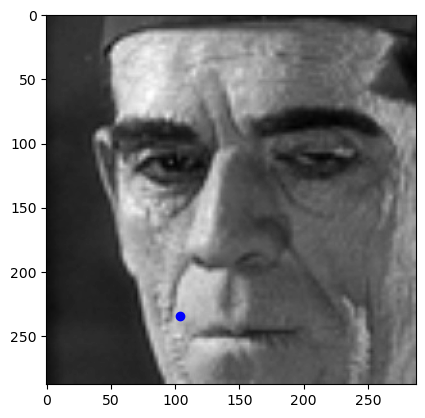

mouth_center_top_lip


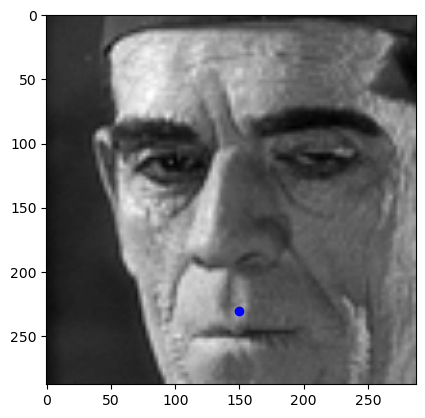

mouth_center_bottom_lip


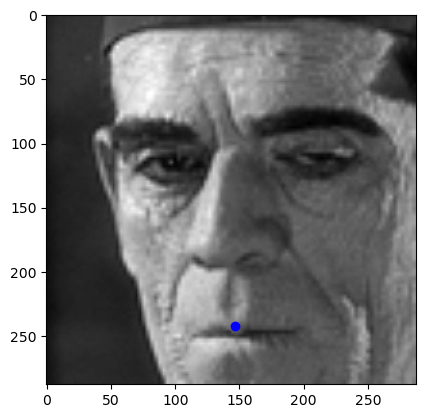

In [61]:
keyps = model_output_to_keypoints_coordinates(res)
for key_name in keypoints_names:
    print(key_name)
    display_image_with_keypoints(img, keyps[key_name])

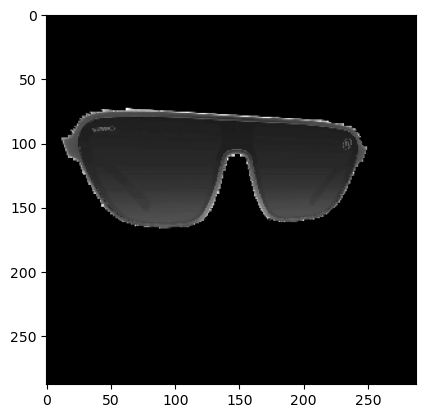

In [62]:
import json

class Filter:
    def __init__(self, json_descr_path: str):
        with open(json_descr_path, 'r') as f:
            data = json.load(f)
            self.image = cv2.imread(f"filters/{data['file_path']}")
            self.ref_points = data['reference_points']
    def show_image(self):
        plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))
    def warp_to_points(self, points: dict) -> np.array:
        dst = []
        src = []
        for keypoint_name in self.ref_points:
            if keypoint_name in points:
                dst.append(points[keypoint_name] * INPUT_SIZE[0])
                src.append(self.ref_points[keypoint_name])
        assert len(dst) == len(src) == 4
        src = np.array(src, dtype=np.float32)
        dst = np.array(dst, dtype=np.float32)
        matrix = cv2.getPerspectiveTransform(src, dst)
        return cv2.warpPerspective(self.image, matrix, (INPUT_SIZE[0], INPUT_SIZE[1]), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

glasses = Filter('filters/sunglasses.json')
glasses_warped = cv2.cvtColor(glasses.warp_to_points(keyps), cv2.COLOR_BGR2GRAY)
plt.imshow(glasses_warped, cmap='gray')

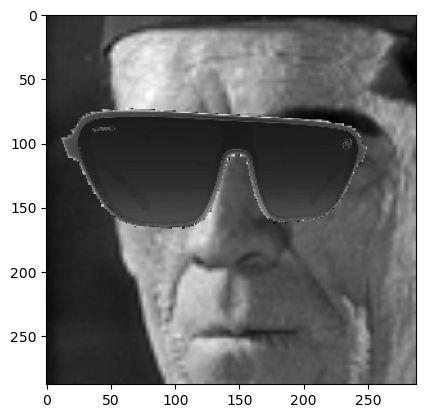

In [63]:
def combine_image_and_filter(img: np.array, filter: np.array) -> np.array:
    pseudo_alpha_filter = (filter > 0).astype(np.uint8)
    inverse_pseudo_alpha_filter = np.ones(INPUT_SIZE[:2]) - pseudo_alpha_filter
    return filter * pseudo_alpha_filter + inverse_pseudo_alpha_filter * img.squeeze()

plt.imshow(combine_image_and_filter(img, glasses_warped), cmap = 'gray')